<h1> Moon Illumination Lab</h1>
<h3>Cameron Kimber</h3>
<h3>Phys 325 Lab</h3>

The goal of program is to find the percent of the moon that is illuminated, and to plot the moon to show what a moon of x% illumination looks like.


In [2]:
%pylab inline
from PIL import Image
from math import asin

Populating the interactive namespace from numpy and matplotlib


In [3]:
date = "October 1, 2017"
file = "moon_1_10_17_1900.png"

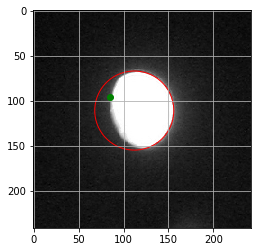

In [4]:
image   = Image.open(file).convert("L")
circle1 = plt.Circle((112,111),44,color='r', fill=False)

plt.imshow(image, cmap = 'gray')
plt.gcf().gca().add_artist(circle1)
plt.plot(85,96, 'go')

plt.show
plt.grid()

Here, the moon is shown in greyscale. The red outline is the full lunar disk, while the white is the portion of the moon that is illuminated.

The green dot marks my marks the 'threshhold value', the lowest illumination I would count as 'illuminated'. I selected a bright spot along the terminator to avoid counting 'noisy' pixels, but to not cut off some pixels that fell in craters or shadows along the terminator that are actually illuminated.

The two lines below check the color value at the threshhold point.

In [5]:
pixel      = image.load()
threshhold = pixel[85,96]
print('The threshhold value is:', threshhold)

The threshhold value is: 155


Here, I make a list of the color values, and iterate over it, counting the number of pixels over the threshold. moon_size refers to the size of the moon in pixels, and has a value of around 6000. brights/ moon_size gives the number of bright pixels divided by the number of pixels the lunar disk covers.

In [11]:
pixel_values = list(image.getdata())                        # List of pixel data
n            = (i for i in pixel_values if i > threshhold)  # Generator statement
brights      = 0                                            # Number of pixels above threshold
moon_size    = pi*44**2                                     # Number of pixels containing moon

for i in n:
    brights += 1
    
illumination = (brights/moon_size) * 100

In [7]:
print("The moon's illumination on %s at 19:00MST was %2.1f%%." % (date, illumination))

The moon's illumination on October 1, 2017 at 19:00MST was 86.2%.


In [8]:
(sin(3.14159*11.81/29.93))**2

0.89428101556174167

<h3>Discussion 1</h3>

The synodic lunar cycle is on average 29.5 days long, and if we assume it is spherical, and the Earth-Moon distance never changes, the illuminated percentage of the Moon, $l$, as a function of time ($t$ in days) is given by

$$l(t) = sin^2\frac{\pi t}{29.5} \times 100$$

And so we can predict the illumination of the moon for a given time. The last new moon occured on September 20 at 11:30MST, so the time between and the time of the observation was 11.81 days. Plugging that time in to the equation, the predicted value of l is 90.1%


Taking the angular size of the moon to be 30' of arc, and the radius 44 pixels, 88 pixels are roughly 30', so that is 0.34 minutes of arc or 20.4 arcseconds per pixel. 

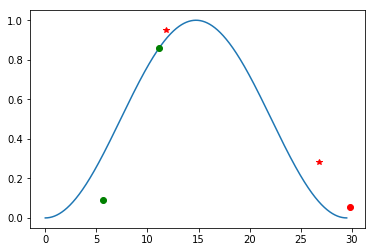

In [12]:
x = linspace(0,29.5,20000)
plt.plot(x,sin(x*pi/29.5)**2)
plt.plot(29.5/pi*asin(.862**(1/2)),.862,'go')
plt.plot(11.81,sin(pi*11.81/29.5),'r*')
plt.plot(26.79,sin(pi*26.79/29.5),'r*')
plt.plot(2*29.5/pi*asin(.089**(1/2)), 0.089, 'go')
plt.plot(29.79, 0.053, 'ro')

The threshhold value is: 81
The moon's illumination on October 1, 2017 at 6:35MST was 5.3%.


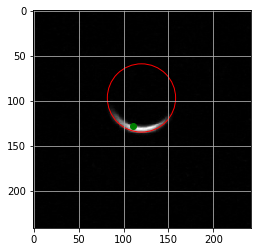

In [13]:
date = "October 1, 2017"
file = "moon_17_10_17_635.png"

image   = Image.open(file).convert("L")
circle1 = plt.Circle((120,97),38,color='r', fill=False)

plt.imshow(image, cmap = 'gray')
plt.gcf().gca().add_artist(circle1)
plt.plot(111,128, 'go')

plt.show
plt.grid()


pixel      = image.load()
threshhold = pixel[111,128]
print('The threshhold value is:',threshhold)

pixel_values = list(image.getdata())                        # List of pixel data
n            = (i for i in pixel_values if i > threshhold)  # Generator statement
brights      = 0                                            # Number of pixels above threshold
moon_size    = pi*38**2                                     # Number of pixels containing moon

for i in n:
    brights += 1
    
illumination = (brights/moon_size) * 100

print("The moon's illumination on %s at 6:35MST was %2.1f%%." % (date, illumination))